# TODO
* Change product_id type -> category : OK
* number of unique date and Na by product -> full series -> enable use of Haar decomp : OK

# CLUSTER PRODUCT INTO TYPES
--------------

## K-iMeans

* Compare product time series
  * Decompose the serie to reduce dimensionality
  * Start with a low value decomposition
* Iterate over K values
  * Along with iterations, iterate through decomposition dimensionality
  * initiate the centroids of each iteration with the (k-1)th dimension projection projected in the kth dimension

----------
### Haar decomposition

In [98]:
import pywt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from functools import reduce

In [2]:
product = pd.read_pickle('./datasets/train_product_series.pkl')

#### Requirements
To be able to use haar decomposition we need to have time series of the same length

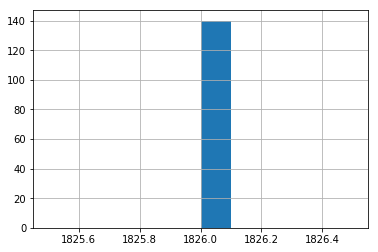

In [62]:
product.groupby('product_id')['date'].apply(lambda x: len(np.unique(x))).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111e9bf60>,
      dtype=object)

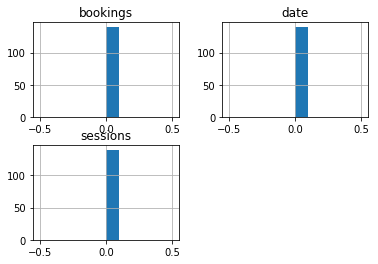

In [68]:
product.groupby('product_id')['date','bookings','sessions'].apply(lambda x: np.sum(x.isna())).hist()

So it seems that we all the products are complete time series of the same length

----------
#### Decomposition

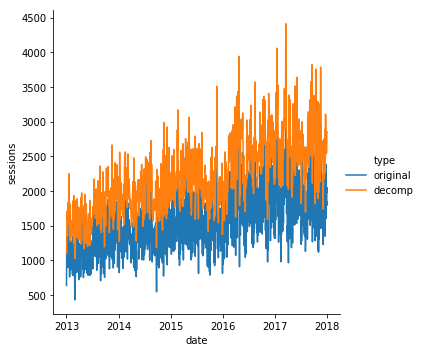

In [116]:
test = pywt.dwt(product[product.product_id == 89].sort_values('date').sessions.tolist(),'haar')
decomp = [(datetime.datetime(2013,1,1) + datetime.timedelta(days = i),j) for i,j in enumerate(reduce(lambda x,y: x+y,[[i,i] for i in test[0]]))]
dtest = pd.DataFrame(decomp,columns = ['date','sessions'])
dtest['type'] = 'decomp'
dt = product[product.product_id == 89].loc[:,['date','sessions']]
dt['type'] = 'original'
dt_plot = pd.concat([dt,dtest],axis = 0)
dt_plot
sns.relplot(data=dt_plot, x = 'date',y='sessions',hue = 'type',kind='line')